In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [56]:
df.shape

(4238, 16)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [58]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


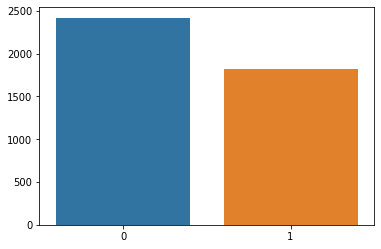

In [59]:
sns.barplot(df["male"].value_counts().index,df["male"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


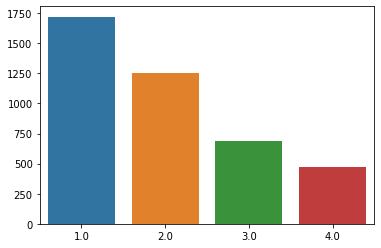

In [60]:
sns.barplot(df["education"].value_counts().index,df["education"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


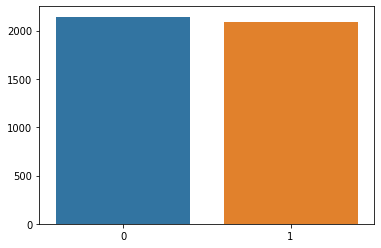

In [61]:
sns.barplot(df["currentSmoker"].value_counts().index,df["currentSmoker"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


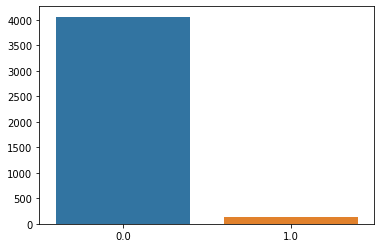

In [62]:
sns.barplot(df["BPMeds"].value_counts().index,df["BPMeds"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


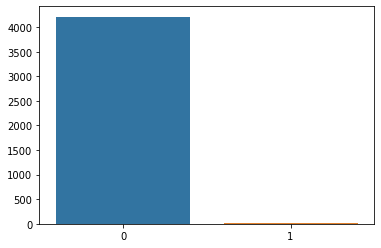

In [63]:
sns.barplot(df["prevalentStroke"].value_counts().index,df["prevalentStroke"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


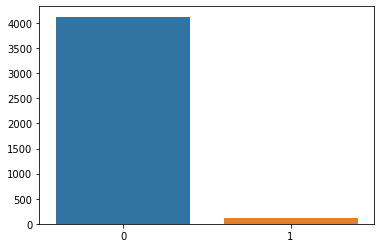

In [64]:
sns.barplot(df["diabetes"].value_counts().index,df["diabetes"].value_counts().values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


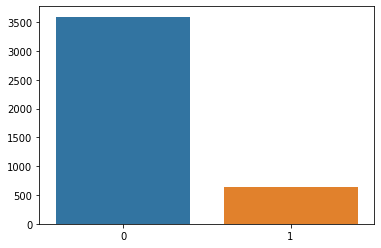

In [65]:
sns.barplot(df["TenYearCHD"].value_counts().index,df["TenYearCHD"].value_counts().values)

In [66]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

As missing data is not only real vallued but also catogorical so deleting the tuple for handling it.

In [67]:
df.dropna(inplace=True)

In [68]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

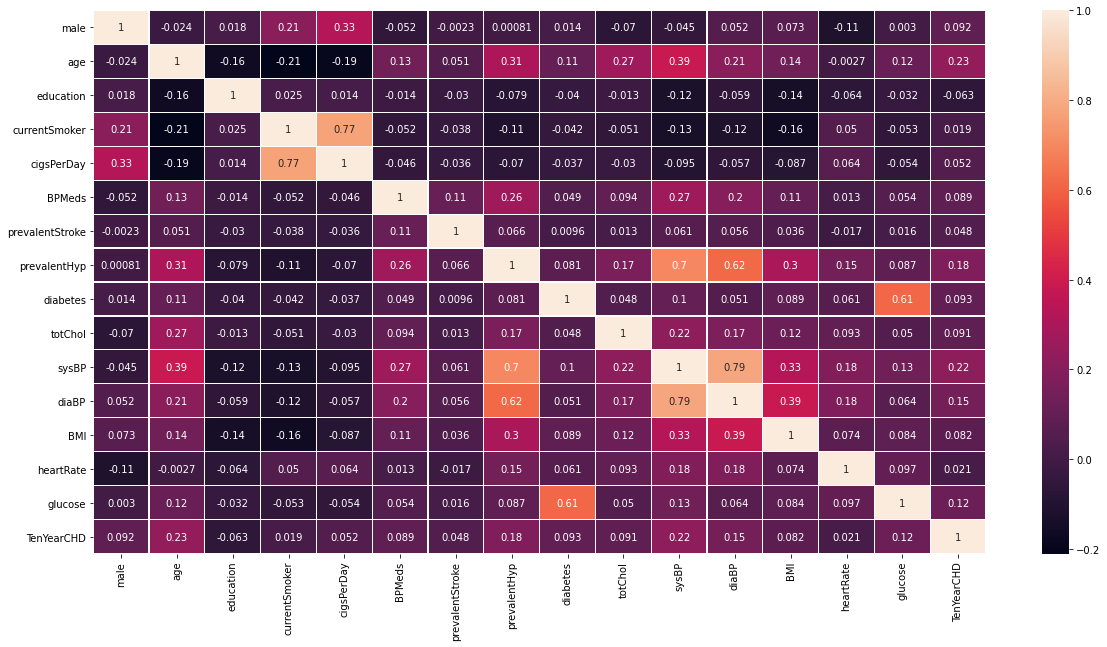

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)

as "currentSmoker" and cigsperday are highly correlated and "sysBP" "diaBP" are highly corelated dropping them for preventing multicolinearity.

In [72]:
df.drop(["currentSmoker","diaBP"],axis=1,inplace=True)

In [73]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [74]:
y = scaled_df['TenYearCHD']
X = scaled_df.drop(['TenYearCHD'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

# Logistic regression

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
normalized_df_logreg_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, normalized_df_logreg_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

The accuracy score for LogisticRegression is: 84.5%


In [77]:
confusion_matrix(y_test,logreg.predict(X_test))

array([[918,   4],
       [166,   9]])

# SVM

In [78]:
from sklearn.svm import SVC

In [79]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)

print('Observations:')
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

Observations:
The accuracy score for SVM is: 83.89999999999999%


In [80]:
confusion_matrix(y_test,svm.predict(X_test))

array([[920,   2],
       [175,   0]])

by comparing both the models we can conclude that logistic regression is a best option as false negatives are minimum in logistic regression model.